In [1]:
import numpy as np 
import pandas as pd
import datetime
from data_preparation.dataloader import DataLoader
from sklearn.preprocessing import LabelEncoder
from data_preparation.data_processing import lightgbm_process,tabnet_preprocess
from conf.configuration import get_model_conf
from conf.configuration import get_model_conf
# from trainer import Trainer

In [ ]:
# DataLoader.all_data

In [2]:
# data = pd.read_parquet('./dataset/dataset_1002_0914.parquet', engine='fastparquet')
# data = pd.read_parquet('./dataset/dataset_1002_0914.parquet', engine='fastparquet')
# data = pd.read_parquet('./dataset/F_base_all_v5.parquet', engine='fastparquet')
data = pd.read_parquet('./data_feature/F_base_all_v5.parquet', engine='fastparquet')
data['time'] = data['Queue_Time'].dt.time
cond1 = data['time']<datetime.time(hour=11, minute=0, second=0)
cond2 = (data['time']>=datetime.time(hour=11, minute=0, second=0))&(data['time']<datetime.time(hour=14, minute=0, second=0))
cond3 = (data['time']>=datetime.time(hour=14, minute=0, second=0))&(data['time']<datetime.time(hour=17, minute=0, second=0))
cond4 = data['time']>=datetime.time(hour=17, minute=0, second=0)
data.loc[cond1,'time_period'] = '開店前'
data.loc[cond2,'time_period'] = '午餐時段'
data.loc[cond3,'time_period'] = '午間時段'
data.loc[cond4,'time_period'] = '晚餐時段'
# data['Wait_Time'] = np.expm1(data['Wait_Time'])
# df = data.copy()

In [3]:
data.head()

,Serial_Number,Queue_Time,Adult_Count,Kid_Count,Total_Count,Wait_Time,Meal_Time,B091_WAITTIME_SUM,B092_WAITTIME_MAX,B093_WAITTIME_MIN,...,Z05_period_60_min_info_for_customer_and_leave_ratio,Z05_period_90_min_info_for_customer_and_total_cnt,Z05_period_90_min_info_for_customer_and_leave_cnt,Z05_period_90_min_info_for_customer_and_leave_ratio,Z05_period_120_min_info_for_customer_and_total_cnt,Z05_period_120_min_info_for_customer_and_leave_cnt,Z05_period_120_min_info_for_customer_and_leave_ratio,Z06_is_rush_hours,time,time_period
0,201601010102,2016-01-01 11:05:38,2.0,0.0,2.0,7.333333,32.133333,119,36,0,...,0.125000,32,4,0.125000,32,4,0.125000,0.0,11:05:38,午餐時段
1,201601010115,2016-01-01 11:09:30,2.0,0.0,2.0,16.600000,30.416667,173,40,0,...,0.113636,44,5,0.113636,44,5,0.113636,0.0,11:09:30,午餐時段
2,201601010123,2016-01-01 11:08:50,2.0,0.0,2.0,12.616667,27.133333,155,39,0,...,0.116279,43,5,0.116279,43,5,0.116279,0.0,11:08:50,午餐時段
3,201601010126,2016-01-01 11:09:14,2.0,0.0,2.0,15.683333,45.100000,180,40,0,...,0.113636,44,5,0.113636,44,5,0.113636,0.0,11:09:14,午餐時段
4,201601010136,2016-01-01 11:15:17,2.0,0.0,2.0,26.233333,41.900000,258,46,1,...,0.101695,59,6,0.101695,59,6,0.101695,0.0,11:15:17,午餐時段


In [4]:
print(data.shape)

(71182, 467)


In [5]:
model_name = 'xgb'
config = get_model_conf(model_name)
# 不須納入feature
excluding_feature = [
'Serial_Number',
'Queue_Time',
'time',
'Wait_Time',
'Meal_Time',
'Z04_cnt_for_date'
'Z04_leave_cnt_for_date'
'Z04_leave_ratio_for_date',
'Z04_cnt_for_period',
'Z04_leave_cnt_for_period',
'Z04_leave_ratio_for_period'
]
data_new, features, config = tabnet_preprocess(data, excluding_feature, config)
# data, features, config = lightgbm_process(data, excluding_feature)
# features = [c for  c in data.columns if c not in excluding_feature]

Adult_Count have 2 missing
Kid_Count have 3 missing
B101_DIFF_ENTERTIME have 61 missing
B111_DIFF_QUEUETIME have 1085 missing
B112_DIFF_QUEUETIME have 8 missing
B121_DIFF_LEAVETIME have 1040 missing
B131_DIFF_QueueTime have 61 missing
B2401_Outside_leave5min_sumwaittime have 10152 missing
B2402_Outside_leave10min_sumwaittime have 2445 missing
B2403_Outside_leave15min_sumwaittime have 1178 missing
B2404_Outside_leave5min_avgwaittime have 10152 missing
B2405_Outside_leave10min_avgwaittime have 2445 missing
B2406_Outside_leave15min_avgwaittime have 1178 missing
B2407_Outside_leave5min_maxwaittime have 10152 missing
B2408_Outside_leave10max_maxwaittime have 2445 missing
B2409_Outside_leave15max_maxwaittime have 1178 missing
B2410_Outside_leave5min_minwaittime have 10152 missing
B2411_Outside_leave10min_minwaittime have 2445 missing
B2412_Outside_leave15min_minwaittime have 1178 missing
E071_StnPres have 15 missing
E072_Temperature have 15 missing
E073_RH have 15 missing
E074_WS have 15 mis

B15_mean_of_waiting_time_for_the_same_cnt_and_month_3_aggfun_min have 47 missing
B16_mean_of_waiting_time_on_last_week_and_15_min_aggfun_mean have 16684 missing
B16_mean_of_waiting_time_on_last_week_and_15_min_aggfun_min have 16684 missing
B16_mean_of_waiting_time_on_last_week_and_15_min_aggfun_max have 16684 missing
B16_mean_of_waiting_time_on_last_week_and_20_min_aggfun_mean have 13987 missing
B16_mean_of_waiting_time_on_last_week_and_20_min_aggfun_min have 13987 missing
B16_mean_of_waiting_time_on_last_week_and_20_min_aggfun_max have 13987 missing
B16_mean_of_waiting_time_on_last_week_and_60_min_aggfun_mean have 6811 missing
B16_mean_of_waiting_time_on_last_week_and_60_min_aggfun_min have 6811 missing
B16_mean_of_waiting_time_on_last_week_and_60_min_aggfun_max have 6811 missing
C22_num_of_reminder_during_dinner_and_aggfun_mean have 60 missing
C22_num_of_reminder_during_dinner_and_aggfun_min have 60 missing
C22_num_of_reminder_during_dinner_and_aggfun_max have 60 missing
C23_ratio_of

In [6]:
print(data_new.shape)

(71182, 467)


In [7]:
# data_new.head()

## 處理categorical_features

In [8]:
# data_info = pd.DataFrame(data.dtypes).\
#     reset_index().\
#     rename(columns={'index': 'feature_name', 0: 'feature_dtype'})
# data_info = data_info[~data_info['feature_name'].isin(excluding_feature)]
# features = [c for c in data.columns if c not in excluding_feature]

# categorical_features = data_info[data_info['feature_dtype'] == np.object]
# numerical_features = data_info[data_info['feature_dtype'].isin(
#     [np.dtype('int64'), np.dtype('float64')])]

In [9]:
# # handling categorical columns
# categorical_col = {}
# categorical_encoder = {}
# for col in categorical_features['feature_name']:
#     missing_cnt = sum(data[col].isnull())
#     if missing_cnt > 0:
#         print('{} have {} missing'.format(col, missing_cnt))
#         data[col] = data[col].fillna('unknow')

#     cat_encoder = LabelEncoder()
#     cat_encoder.fit(data[col].values)
#     data[col] = cat_encoder.transform(data[col].values)
#     data[col] = data[col].astype('int64')

#     categorical_encoder[col] = cat_encoder
#     categorical_col[col] = len(cat_encoder.classes_)

# cat_info = [(i, f) for i, f in enumerate(features)
#             if f in categorical_features['feature_name'].tolist()]
# cat_idxs = [i for i, _ in cat_info]
# cat_dims = [categorical_col[j] for _, j in cat_info]

# emb_dim_biner = [0, 2, 4, 7]
# cat_emb_dim = pd.cut(np.array(cat_dims), emb_dim_biner,
#                      labels=[1, 2, 5]).tolist()

## 訓練

In [10]:
data = data_new

In [11]:
data

,Serial_Number,Queue_Time,Adult_Count,Kid_Count,Total_Count,Wait_Time,Meal_Time,B091_WAITTIME_SUM,B092_WAITTIME_MAX,B093_WAITTIME_MIN,...,Z05_period_60_min_info_for_customer_and_leave_ratio,Z05_period_90_min_info_for_customer_and_total_cnt,Z05_period_90_min_info_for_customer_and_leave_cnt,Z05_period_90_min_info_for_customer_and_leave_ratio,Z05_period_120_min_info_for_customer_and_total_cnt,Z05_period_120_min_info_for_customer_and_leave_cnt,Z05_period_120_min_info_for_customer_and_leave_ratio,Z06_is_rush_hours,time,time_period
0,201601010102,2016-01-01 11:05:38,2.0,0.0,2.0,7.333333,32.133333,119,36,0,...,0.125000,32,4,0.125000,32,4,0.125000,0.0,11:05:38,1
1,201601010115,2016-01-01 11:09:30,2.0,0.0,2.0,16.600000,30.416667,173,40,0,...,0.113636,44,5,0.113636,44,5,0.113636,0.0,11:09:30,1
2,201601010123,2016-01-01 11:08:50,2.0,0.0,2.0,12.616667,27.133333,155,39,0,...,0.116279,43,5,0.116279,43,5,0.116279,0.0,11:08:50,1
3,201601010126,2016-01-01 11:09:14,2.0,0.0,2.0,15.683333,45.100000,180,40,0,...,0.113636,44,5,0.113636,44,5,0.113636,0.0,11:09:14,1
4,201601010136,2016-01-01 11:15:17,2.0,0.0,2.0,26.233333,41.900000,258,46,1,...,0.101695,59,6,0.101695,59,6,0.101695,0.0,11:15:17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71177,201812311500,2018-12-31 20:23:55,3.0,0.0,3.0,105.566667,46.333333,34964,247,0,...,0.406977,189,83,0.439153,280,123,0.439286,0.0,20:23:55,2
71178,201812311501,2018-12-31 19:33:48,2.0,0.0,2.0,141.866667,60.383333,34530,227,0,...,0.457447,274,126,0.459854,390,173,0.443590,1.0,19:33:48,2
71179,201812311503,2018-12-31 19:25:52,4.0,0.0,4.0,143.716667,50.266667,34343,219,0,...,0.438776,278,127,0.456835,401,178,0.443890,1.0,19:25:52,2
71180,201812311505,2018-12-31 19:39:59,2.0,0.0,2.0,136.416667,41.533333,34278,203,0,...,0.468927,274,127,0.463504,372,170,0.456989,1.0,19:39:59,2


In [12]:
dataloader = DataLoader(k_fold = 1, split_size = 0.1, valid_split_date = '2017-07-01 00:00:00', test_split_date = '2018-01-01 00:00:00')
dataloader.transform(data, index_col = 'Serial_Number', 
                   date_col = 'Queue_Time', 
                   target_col = 'Wait_Time',
                   feature_col = features,
                   exculding_cols = excluding_feature)
dd1 = dataloader.excluding_abnormal_data(data_type = 'train_dataset', method = 'isolation_forest',
                                             use_feature = ['Wait_Time','Z03_WAITTIME_group_size','Z03_WAITTIME_cnt'], 
                                             contamination = 0.3 )

In [ ]:
# data['B2401_Outside_leave5min_sumwaittime'].isna().sum()

In [ ]:
# train_dataset = dataloader.training_data()
# _, (test_df, test_x, test_y) = dataloader.testing_data()

In [ ]:
# test_y = np.array(test_y)

In [13]:
_, (test_df, test_x, test_y) = dataloader.testing_data()
num_train_dataset = dataloader.num_training_dataset()
train_dataset = dataloader.training_data()
all_serial_number, all_data = dataloader.all_data()
# test_dataset = dataloader.testing_data()

for i, train_set, valid_set in train_dataset:
    train_X, train_y = train_set
    valid_X, valid_y = valid_set
    
    train_X = train_X.values
    valid_X = valid_X.values
    train_y = train_y.values.reshape(-1,1)
    valid_y = valid_y.values.reshape(-1,1)
    
#     # output = self.training_process(self.config)


2017-07-01 10:33:08 2017-12-31 20:59:06


In [16]:
# all_data

In [17]:
print("train_X shape: {}".format(train_X.shape))
print("test_x shape: {}".format(test_x.shape))
print("train_y shape: {}".format(train_y.shape))
print("test_y shape: {}".format(test_y.shape))
print("valid_X shape: {}".format(valid_X.shape))
print("valid_y shape: {}".format(valid_y.shape))

train_X shape: (28623, 459)
test_x shape: (20191, 459)
train_y shape: (28623, 1)
test_y shape: (20191,)
valid_X shape: (10101, 459)
valid_y shape: (10101, 1)


In [18]:
def generate_csv(serial_number, predict_data, model_name):
    serial_number = pd.DataFrame(serial_number)
    predict_data = pd.DataFrame(predict_data)

    result = pd.concat([serial_number, predict_data], axis=1)
    result.columns = ['Serial_Number', f'{model_name}_predict']
    result.to_csv(f"{model_name}_result.csv", index=False)

## XGBoost

In [19]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

In [20]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

model = XGBRegressor(max_depth=8,
    learning_rate=0.1,
    n_estimators=1000,
    verbosity=0,
    silent=None,
    objective='reg:linear',
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)

# eval_set = [(test_x, test_y)]
eval_set = [(valid_X, valid_y )]

model.fit(train_X, train_y ,
          eval_set = eval_set,
          early_stopping_rounds=30,
          verbose=10)

[0]	validation_0-rmse:53.72851
[10]	validation_0-rmse:30.48606
[20]	validation_0-rmse:23.87726
[30]	validation_0-rmse:21.88011
[40]	validation_0-rmse:21.30387
[50]	validation_0-rmse:21.07780
[60]	validation_0-rmse:20.96548
[70]	validation_0-rmse:20.87919
[80]	validation_0-rmse:20.85822
[90]	validation_0-rmse:20.81194
[100]	validation_0-rmse:20.81642
[110]	validation_0-rmse:20.82825
[120]	validation_0-rmse:20.86976
[125]	validation_0-rmse:20.89193


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, nthread=-1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

In [21]:
preds = np.array(model.predict(valid_X))
valid_auc = mean_squared_error(y_pred=preds, y_true=valid_y)
print(valid_auc)

preds = np.array(model.predict(test_x ))
test_auc = mean_squared_error(y_pred=preds, y_true=test_y )
print(test_auc)

431.9968969891184
497.2934021008951


In [22]:
model.best_iteration

95

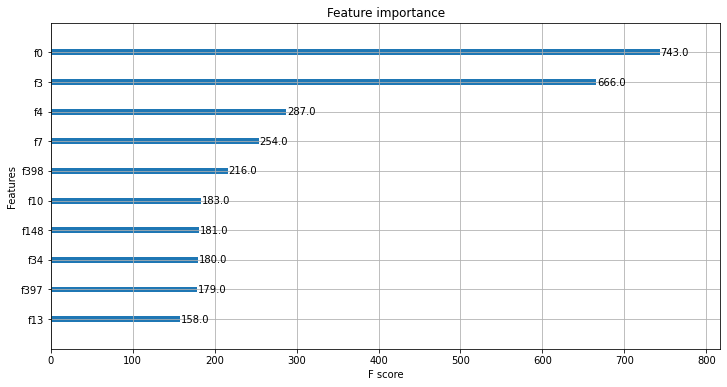

In [23]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
# 顯示重要特徵
# plot_importance(model)
# plt.show()
fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=10, ax=ax)
plt.show();

In [24]:
## 產生auc

In [25]:
def time_period_accuracy1(y_test, y_predict, time_period):
    time_range = time_period
    time_diff = abs(np.array(y_test)[:,0] - y_predict)
    hitting_cnt = sum(time_diff <= time_range)
    result = hitting_cnt/len(y_test)

    return round(result, 2)

In [26]:
def time_period_accuracy2(y_test, y_predict, time_period):
    test_y = y_test
    predicted_y = y_predict
    time_range = time_period
    time_diff = abs(np.array(test_y) - predicted_y)
    hitting_cnt = sum(time_diff <= time_range)
    result = hitting_cnt/len(test_y)

    return round(result, 2)

In [27]:
# train_predicted_y = np.expm1(model.predict(train_X))
# valid_predicted_y = np.expm1(model.predict(valid_X))
# predicted_y = np.expm1(model.predict(test_x))
train_predicted_y = model.predict(train_X)
valid_predicted_y = model.predict(valid_X)
predicted_y = model.predict(test_x)
print(train_predicted_y)
print(valid_predicted_y)
print(predicted_y)

[18.658333 18.35721  24.782642 ... 36.612507 45.942505 27.515211]
[29.679605 25.097208 23.761047 ... 66.49808  62.865738 66.69407 ]
[29.055443 29.421867 26.259615 ... 64.99082  62.020893 66.33025 ]


In [28]:
# train_predicted_y
train_5  = time_period_accuracy1(y_test = train_y,y_predict = train_predicted_y,time_period= 5)
train_10 = time_period_accuracy1(y_test = train_y,y_predict = train_predicted_y,time_period= 10)
train_15 = time_period_accuracy1(y_test = train_y,y_predict = train_predicted_y,time_period= 15)

# valid_predicted_y
valid_5  = time_period_accuracy1(y_test = valid_y,y_predict = valid_predicted_y,time_period= 5)
valid_10 = time_period_accuracy1(y_test = valid_y,y_predict = valid_predicted_y,time_period= 10)
valid_15 = time_period_accuracy1(y_test = valid_y,y_predict = valid_predicted_y,time_period= 15)

# test_predicted_y
test_5  = time_period_accuracy2(y_test = test_y,y_predict = predicted_y,time_period= 5)
test_10 = time_period_accuracy2(y_test = test_y,y_predict = predicted_y,time_period= 10)
test_15 = time_period_accuracy2(y_test = test_y,y_predict = predicted_y,time_period= 15)

In [29]:
print('--------train_predicted_y--------')
print(f'train:5  auc:{train_5}')
print(f'train:10 auc:{train_10}')
print(f'train:15 auc:{train_15}')
print('---------------------------------')
print('--------valid_predicted_y--------')
print(f'valid:5  auc:{valid_5}')
print(f'valid:10 auc:{valid_10}')
print(f'valid:15 auc:{valid_15}')
print('---------------------------------')
print('--------test_predicted_y---------')
print(f'test:5  auc:{test_5}')
print(f'test:10 auc:{test_10}')
print(f'test:15 auc:{test_15}')
print('---------------------------------')

--------train_predicted_y--------
train:5  auc:0.75
train:10 auc:0.96
train:15 auc:0.99
---------------------------------
--------valid_predicted_y--------
valid:5  auc:0.33
valid:10 auc:0.57
valid:15 auc:0.71
---------------------------------
--------test_predicted_y---------
test:5  auc:0.31
test:10 auc:0.55
test:15 auc:0.7
---------------------------------


In [32]:
all_predicted_y = model.predict(all_data)

In [33]:
all_predicted_y

array([20.330542, 18.658333, 18.816944, ..., 64.99082 , 62.020893,
       66.33025 ], dtype=float32)

In [34]:
generate_csv(all_serial_number,all_predicted_y,'xgb')

In [ ]:
# train_predicted_y
time_range = 10
time_diff = abs(np.array(train_y)[:,0] - train_predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(train_y)
result

In [ ]:
# train_predicted_y
time_range = 10
time_diff = abs(np.array(train_y)[:,0] - train_predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(train_y)
result

In [ ]:
# train_predicted_y
time_range = 5
time_diff = abs(np.array(train_y)[:,0] - train_predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(train_y)
result

In [ ]:
# valid_predicted_y
time_range = 15
time_diff = abs(np.array(valid_y)[:,0] - valid_predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(valid_y)
result

In [ ]:
# valid_predicted_y
time_range = 10
time_diff = abs(np.array(valid_y)[:,0] - valid_predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(valid_y)
result

In [ ]:
# valid_predicted_y
time_range = 5
time_diff = abs(np.array(valid_y)[:,0] - valid_predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(valid_y)
result

In [ ]:
# predicted_y
time_range = 15
time_diff = abs(np.array(test_y) - predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(test_y)
result

In [ ]:
# predicted_y
time_range = 10
time_diff = abs(np.array(test_y) - predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(test_y)
result

In [ ]:
# predicted_y
time_range = 5
time_diff = abs(np.array(test_y) - predicted_y)
hitting_cnt = sum(time_diff <= time_range)
result = hitting_cnt/len(test_y)
result